In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from abtem import *
from ase.io import read

STEM simulations can be very slow, because each new STEM probe is computed independently. An alternative is to use the multislice method to compute a scattering matrix, which is then used to construct each STEM probe. This algorithm often requires roughly the same computational time as the mutlislice method, but also allows for huge speed-ups by using Fourier interpolation of the scattering matrix. Thus we call this approach the plane-wave recriprocal-space interpolated scattering matrix (PRISM) algorithm. 

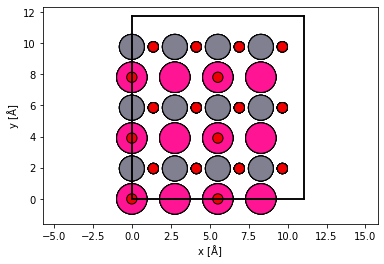

In [16]:
atoms = read('srtio3_110.cif')# * (3, 2, 1)

atoms.center(vacuum=3, axis=2)
potential = Potential(FrozenPhonons(atoms, 5, {'C':.2}, seed=7), sampling=.05, slice_thickness=1)

#detector = AnnularDetector(inner=.086, outer=.19)
#gridscan = GridScan(start=[0, 0], end=[np.sqrt(3) * 1.42, 3 * 1.42], sampling=.2)

In [11]:
potential = Potential(Atoms('C', positions=[(2.5, 2.5, 2)], cell=(5, 5, 4)))
linescan = LineScan(start=[0, 0], end=[2.5, 2.5], gpts=10)
detector = AnnularDetector(inner=.0, outer=.02)

S_builder = SMatrixBuilder(30, 1, energy=80e3, gpts=500)
S = S_builder.multislice(potential, pbar=False)
probe = Probe(semiangle_cutoff=30, energy=80e3, gpts=500)

prism_measurements = S.scan(linescan, [detector], max_batch_probes=10, pbar=False)
measurements = probe.scan(linescan, [detector], potential, max_batch=50, pbar=False)

assert np.allclose(measurements[detector].array, prism_measurements[detector].array, atol=1e-6)

KeyError: <abtem.detect.AnnularDetector object at 0x13260047b8>

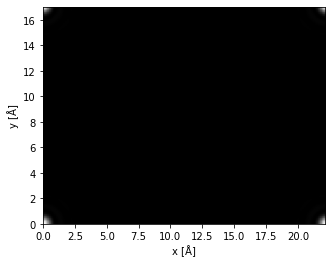

In [10]:
S_builder = SMatrixBuilder(25, 1, energy=80e3, device='cpu')
S_builder.grid.match(potential)

S_builder.build().collapse([0,0]).show()
#S = S_builder.multislice(potential, max_batch=20)

In [69]:
S_builder.scan(potential, gridscan, [detector])

{<abtem.detect.AnnularDetector at 0x13437caa58>: <abtem.measure.Measurement at 0x1343433ef0>}

In [41]:
measurements = S.scan(gridscan, [detector], max_batch_positions=50)

In [43]:
#measurements[detector].show()

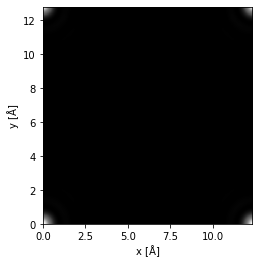

In [22]:
S.collapse([0,0], None).show()

In [16]:
#linescan = LineScan(start=[2 * np.sqrt(3) * 1.42, 0], end=[2 * np.sqrt(3) * 1.42, 3 * 1.42], gpts=100)

S_builder = SMatrixBuilder(.025, 1, energy=80e3, device='cpu')
b
S_builder.grid.match(potential)

haadf = AnnularDetector(inner=.09, outer=.2)

gridscan = GridScan(start=[0, 0], end=[potential.extent[0], potential.extent[1]], sampling=.1)

S = S_builder.build().multislice(potential)

In [42]:
a = np.random.randn(128,128) + np.random.randn(128,128)*1.j
b = np.random.randn(128,128) + np.random.randn(128,128)*1.j

aa1 = np.sum(np.abs(a)**2)
aa2 = np.sum(a)

bb1 = np.sum(np.abs(b)**2)
bb2 = np.sum(b)

print(np.sum(np.abs(a+b)**2), aa1+bb1, np.abs(aa2-bb2)**2)

print(np.sum((a.real + b.real)**2 + (a.imag + b.imag)**2), )
print(np.sum(a.real**2) + np.sum(b.real**2) + 2*np.sum(a.real*b.real) + np.sum((a.imag + b.imag)**2))

65608.23555982047 65865.3346232117 12727.784462066875
65608.23555982047
65608.23555982047


In [14]:
#for i in tqdm(range(1000)):
measurements = S.scan(gridscan, [haadf], max_batch=128, pbar=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x13255e16d8>,
 <matplotlib.image.AxesImage at 0x13254b5780>)

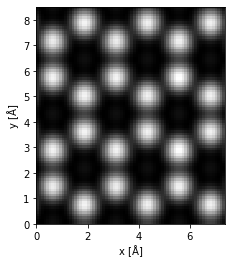

In [15]:
measurements[haadf].show()

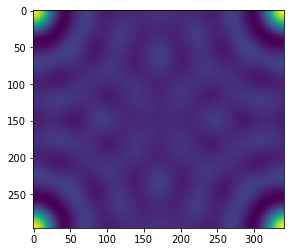

In [32]:
S = S_builder.build()
plt.imshow(cp.asnumpy(S.collapse(np.zeros((16,2))).array.real[0])) #.show()


In [4]:
S = S_builder.build()
for i in tqdm(range(10000)):
    #S_builder.build()
    S.collapse(np.zeros((1,2)))

NameError: name 'S_builder' is not defined

In [86]:
16*16

256

c:\intelpython3\lib\site-packages\scipy\ndimage\interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(<matplotlib.axes._subplots.AxesSubplot at 0x23d95d67cc8>,
 <matplotlib.image.AxesImage at 0x23d963e04c8>)

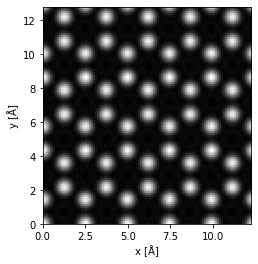

In [40]:
measurements[haadf].tile((5,3)).interpolate(.04).show()

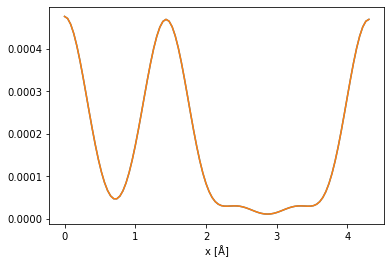

In [5]:
ax = Measurement.read('linescan.hdf5').show()
measurements[haadf].show(ax=ax)

In [4]:
from abtem.detect import AnnularDetector
from abtem.scan import LineScan

potential = Potential(atoms, sampling=.05, slice_thickness=1).calculate().as_transmission_functions(80e3)
linescan = LineScan(start=[2 * np.sqrt(3) * 1.42, 0], end=[2 * np.sqrt(3) * 1.42, 3 * 1.42], gpts=10)
bright = AnnularDetector(inner=.0, outer=.02)

S_builder = SMatrixBuilder(.03, 1, energy=80e3, extent=5, sampling=.05)
#S = S_builder.multislice(potential)
probe = Probe(semiangle_cutoff=.03, energy=80e3, extent=2, sampling=.05)

#detector = AnnularDetector(inner=.086, outer=.19)
#gridscan = GridScan(start=[0, 0], end=[np.sqrt(3) * 1.42, 3 * 1.42], sampling=.2)
#prism_measurements = S.scan(linescan, [detector], max_batch=10, show_progress=False)
#measurements = probe.scan(linescan, [detector], potential, max_batch=50, show_progress=False)

#measurements[detector].array - prism_measurements[detector].array

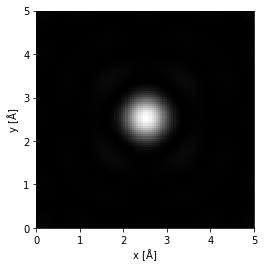

In [5]:
#plt.imshow(S_builder.build().array[0].real-S_builder.build().array[-1].real)
#plt.colorbar()
S = S_builder.build()
S.collapse([2.5,2.5]).intensity[0].show()

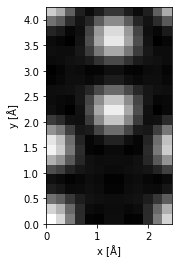

In [22]:
measurements[detector].show()

In [6]:


probe = Probe(semiangle_cutoff=.03, energy=80e3)
probe.grid.match(potential)
#probe = probe.build([[0,0]]).array[0]


#potential.show(scans=gridscan)

measurements = probe.scan(gridscan, potential, [detector], max_batch=200, show_progress=True)

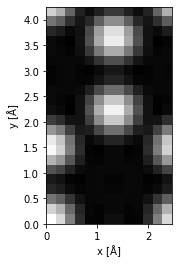

In [52]:
measurements[detector].show()

In [57]:
S_builder = SMatrixBuilder(.03, 2, energy=80e3, gpts=512, extent=10)
S = S_builder.build()
#S.set_position([5,5])
#p = S.array.sum(0)
#S.always_recenter=False

In [68]:
for i in tqdm(range(1000000)):
    S_probe = S.collapse([0,0])#.show()


#probe = Probe(semiangle_cutoff=.03, energy=80e3, extent=S.extent / 2, gpts=S.gpts // 2).build([2.5,2.5])
#p.show()

KeyboardInterrupt: 

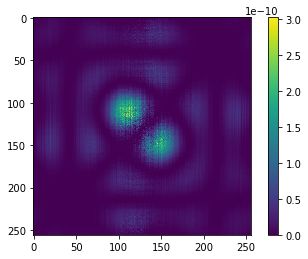

In [67]:
plt.imshow(np.abs(S_probe.array- probe.array)[0] ** 2)
plt.colorbar()

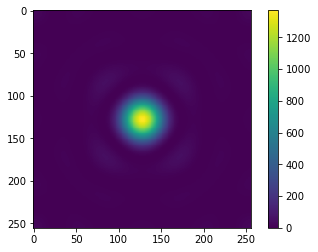

In [66]:
plt.imshow(np.abs(probe.array)[0] ** 2)
plt.colorbar()